## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
start_time = time.time()

In [2]:
import dendrotweaks as dd

In [3]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [4]:
model = dd.Model(path_to_model)

In [5]:
dd.apply_dark_theme()

## Load morphology

In [6]:
model.list_morphologies()

['original', 'main']

In [7]:
model.load_morphology(file_name='main')

Sorted PointTree(root=Point(idx=0), num_nodes=5077).
Extended 178 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=5255).


In [8]:
model.domains

{'axon': <Domain(axon, 2, #F0E442, 13 sections)>,
 'basal': <Domain(basal, 31, #31A354, 48 sections)>,
 'oblique': <Domain(oblique, 43, #8C564B, 72 sections)>,
 'soma': <Domain(soma, 1, #E69F00, 1 sections)>,
 'trunk': <Domain(trunk, 41, #56B4E9, 25 sections)>,
 'tuft': <Domain(tuft, 42, #A55194, 22 sections)>}

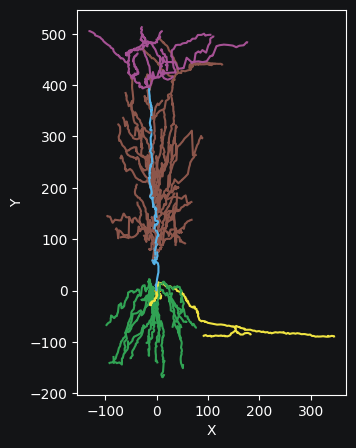

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(ax, 
                    show_points=False,
                    show_lines=True,
                    annotate=False)

## Load mechanisms

In [10]:
model.list_biophys()

['main', 'main_blocked_ih']

In [11]:
model.load_biophys(file_name='main')

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/km.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/h.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/kap.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/calH.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/cat.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/Na_soma.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/Kdr_dend.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/somacar.py
Saved content to /home/roman/Documents/code/DendroTwe

## Load stimuli

In [12]:
model.list_stimuli()

['current_soma_depol',
 'syn_40_ampa_nmda_clustered',
 'current_soma_dend_hyperpol_blocked_ih',
 'syn_40_ampa_nmda_distributed']

In [13]:
model.load_stimuli(file_name='current_soma_depol')

In [14]:
from dendrotweaks.analysis import detect_somatic_spikes, plot_somatic_spikes

Detected 27 spikes
Average spike half-width: 1.75 ms
Average spike amplitude: 88.90 mV
Spike frequency: 38.57 Hz


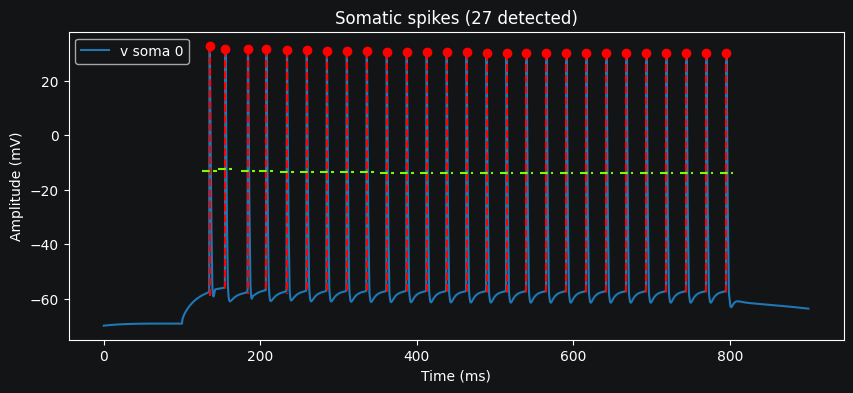

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.run(900);
model.simulator.plot_voltage(ax=ax)
spike_data = detect_somatic_spikes(model)
plot_somatic_spikes(spike_data, ax, show_metrics=True)

In [16]:
end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

Total execution time: 29.05 seconds
2025-12-07 12:28:40
